<a href="https://colab.research.google.com/github/paddoum/ANImageBitmapRep/blob/master/examples/_notebooks/google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### info

This notebook is a basic setup for running [vsketch](https://github.com/abey79/vsketch) on Google Colab. Execute the following line once to setup vsketch in the notebook.

Notebook made by [dark fractures.](https://www.darkfractures.com)

In [1]:
!pip install git+https://github.com/abey79/vsketch#egg=vsketch[colab]

DEPRECATION: git+https://github.com/abey79/vsketch#egg=vsketch[colab] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/abey79/vsketch to /tmp/pip-install-72at5wnl/vsketch_58b992c280c3461fa80201fe6d3bfba6
  Running command git clone --filter=blob:none --quiet https://github.com/abey79/vsketch /tmp/pip-install-72at5wnl/vsketch_58b992c280c3461fa80201fe6d3bfba6
  Resolved https://github.com/abey79/vsketch to commit 7a268ed9caee9a01b6f0cc791f82f98f5cfc8971
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

### sketch

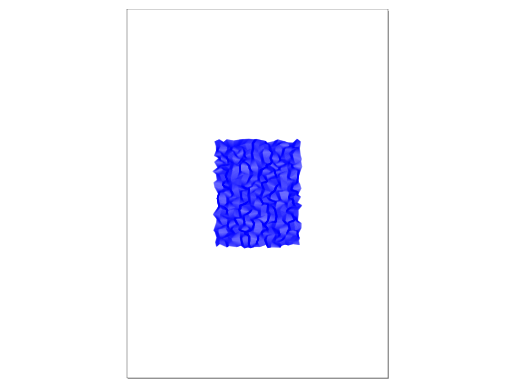

In [7]:
import vsketch
import numpy as np


class RandomLinesSketch(vsketch.SketchClass):
    # Sketch parameters:
    # radius = vsketch.Param(2.0)

    def draw(self, vsk: vsketch.Vsketch) -> None:
        vsk.size("a1", landscape=False)
        vsk.scale("cm")

        allColumnsPoints =  []
        for row in range(20):
            columnPoints = []
            for col in range(25):
                x = row + vsk.random(1.5)
                y = col + vsk.random(1)
                columnPoints.append((x,y))
            allColumnsPoints.append(columnPoints)

        for index in range(len(allColumnsPoints) -1):
            currentColumnPoints = allColumnsPoints[index]
            nextColumnPoints = allColumnsPoints[index+1]

            currentColumnPointsUnzipped = zip(*currentColumnPoints)
            currentColumnPointsUnzipped = list(currentColumnPointsUnzipped)
            xTuples = currentColumnPointsUnzipped[0]
            yTuples = currentColumnPointsUnzipped[1]
            xCoordinatesCurrentColumn = np.array(xTuples)
            yCoordinatesCurrentColumn = np.array(yTuples)

            nextColumnPointsUnzipped = zip(*nextColumnPoints)
            nextColumnPointsUnzipped = list(nextColumnPointsUnzipped)
            xTuples = nextColumnPointsUnzipped[0]
            yTuples = nextColumnPointsUnzipped[1]
            xCoordinatesNextColumn = np.array(xTuples)
            yCoordinatesNextColumn = np.array(yTuples)

            interpolation_steps = 9
            for interpolation_step in range(interpolation_steps):
                interpolated_x = vsk.lerp(xCoordinatesCurrentColumn, xCoordinatesNextColumn, interpolation_step/interpolation_steps)
                interpolated_y = vsk.lerp(yCoordinatesCurrentColumn, yCoordinatesNextColumn, interpolation_step/interpolation_steps)
                interpolated_coordinates = zip(interpolated_x, interpolated_y)
                vsk.polygon(interpolated_coordinates)

    def finalize(self, vsk: vsketch.Vsketch) -> None:
        vsk.vpype("linemerge linesimplify reloop linesort")


if __name__ == "__main__":
    RandomLinesSketch.display()
